Install of `category_encoders`

In [1]:
! pip install category_encoders

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data in dataframe

In [3]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

# Drop of Unnamed column:

df = df.drop('Unnamed: 0', axis= 1)

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# 2. About the dataset

From: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

**DATASET**

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**FEATURES**

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It 
is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.



# 3. Dataframe's infos

## 3.1. Shape

In [5]:
f'{df.shape[1]} columns and {df.shape[0]} rows.'

'11 columns and 300153 rows.'

## 3.2. Infos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


* All columns have textual data, except the columns: `duration`, `days_left` and `price`.
* There is no missing data in the columns.

## 3.3. Duplicate data

In [7]:
df.loc[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


* No duplicate data in the dataset.

# 4. Data treatment

## 4.1. Drop of `flight` column

In [8]:
df = df.drop('flight', axis= 1)

# 5. Exploratory analysis

## 5.1. Column `airline`

The airlines in the dataset are:

In [9]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

### Which airlines are most frequent in the dataset?

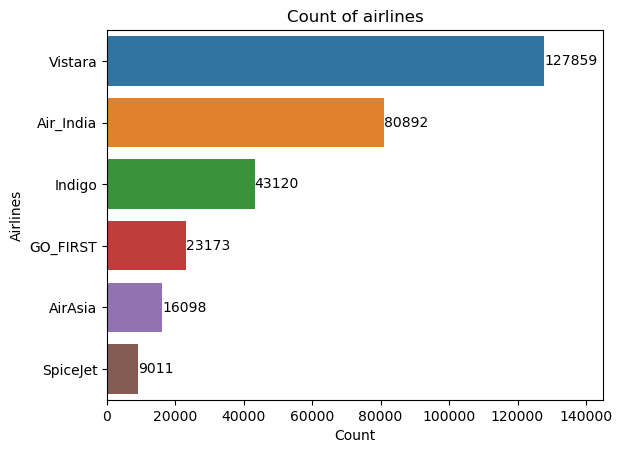

In [10]:
# Countplot of airlines:

ax = sns.countplot(data= df, y= 'airline', order= df['airline'].value_counts().index)

# Set label for each bar in countplot:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_xlim([0, 1.45e5]) # set the limit of xaxis.
ax.set_title('Count of airlines')
ax.set_ylabel('Airlines')
ax.set_xlabel('Count')
plt.show()

> * Vistara, Air India and Indigo are the airlines that appear the most in the dataset.

## 5.2. Column `source_city`

The source cities in dataset are:

In [11]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

### Which cities are most frequent in the dataset?

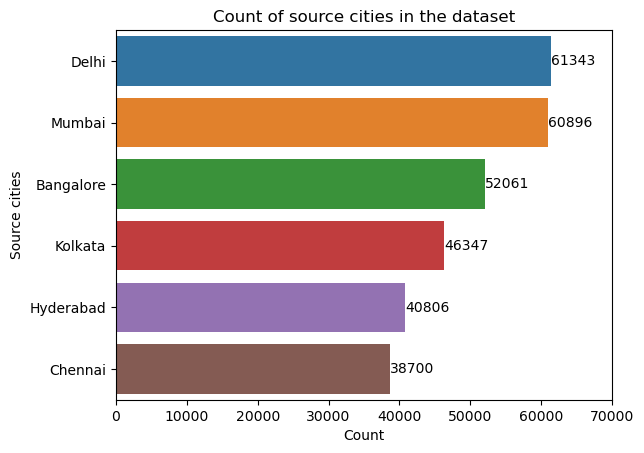

In [12]:
# Countplot of source cities:

ax = sns.countplot(data= df, y= 'source_city')

# Set label for each bar in countplot: 

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_title('Count of source cities in the dataset')
ax.set_ylabel('Source cities')
ax.set_xlabel('Count')
ax.set_xlim([0, 7e4])
plt.show()

> * Delhi and Mombai are the origin cities of the most frequent flights in the dataset.

### What are the most popular source cities for the airlines?

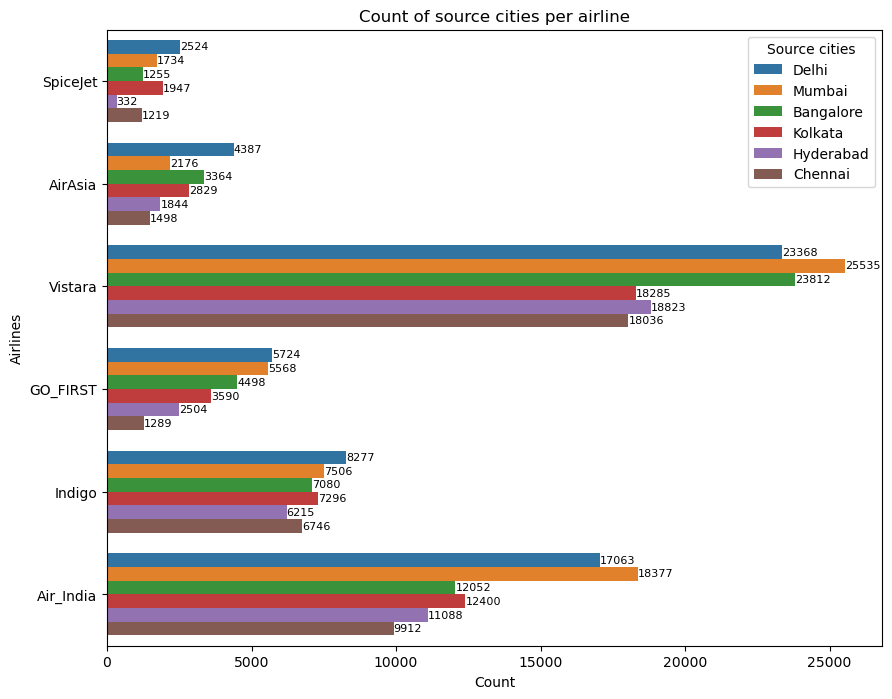

In [13]:
# Countplot of source cities per airlines:

plt.figure(figsize= (10, 8))
ax = sns.countplot(data= df, y= 'airline', hue= 'source_city')

# Set label for each bar in countplot: 

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_title('Count of source cities per airline')
ax.set_ylabel('Airlines')
ax.set_xlabel('Count')
ax.legend(title= 'Source cities')
plt.show()

> * The graph shows a higher volume of data for Vistara and Air India airlines than was already visualized in the airline count graph. In these two cases, Mombai is the most frequent source city.
> * For the other airlines, the city of Delhi is the most frequent.

## 5.3. Column `departure_time`

In [14]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

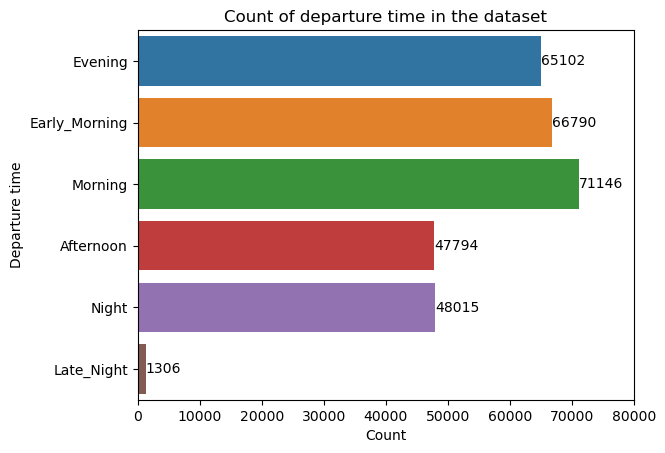

In [15]:
# Countplot of departure time:

ax = sns.countplot(data= df, y= 'departure_time')

# Set label for each bar in countplot: 

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_title('Count of departure time in the dataset')
ax.set_ylabel('Departure time')
ax.set_xlabel('Count')
ax.set_xlim([0, 8e4]) # set the xaxis limit.
plt.show()

### What are the most common departure times for cities and airlines?

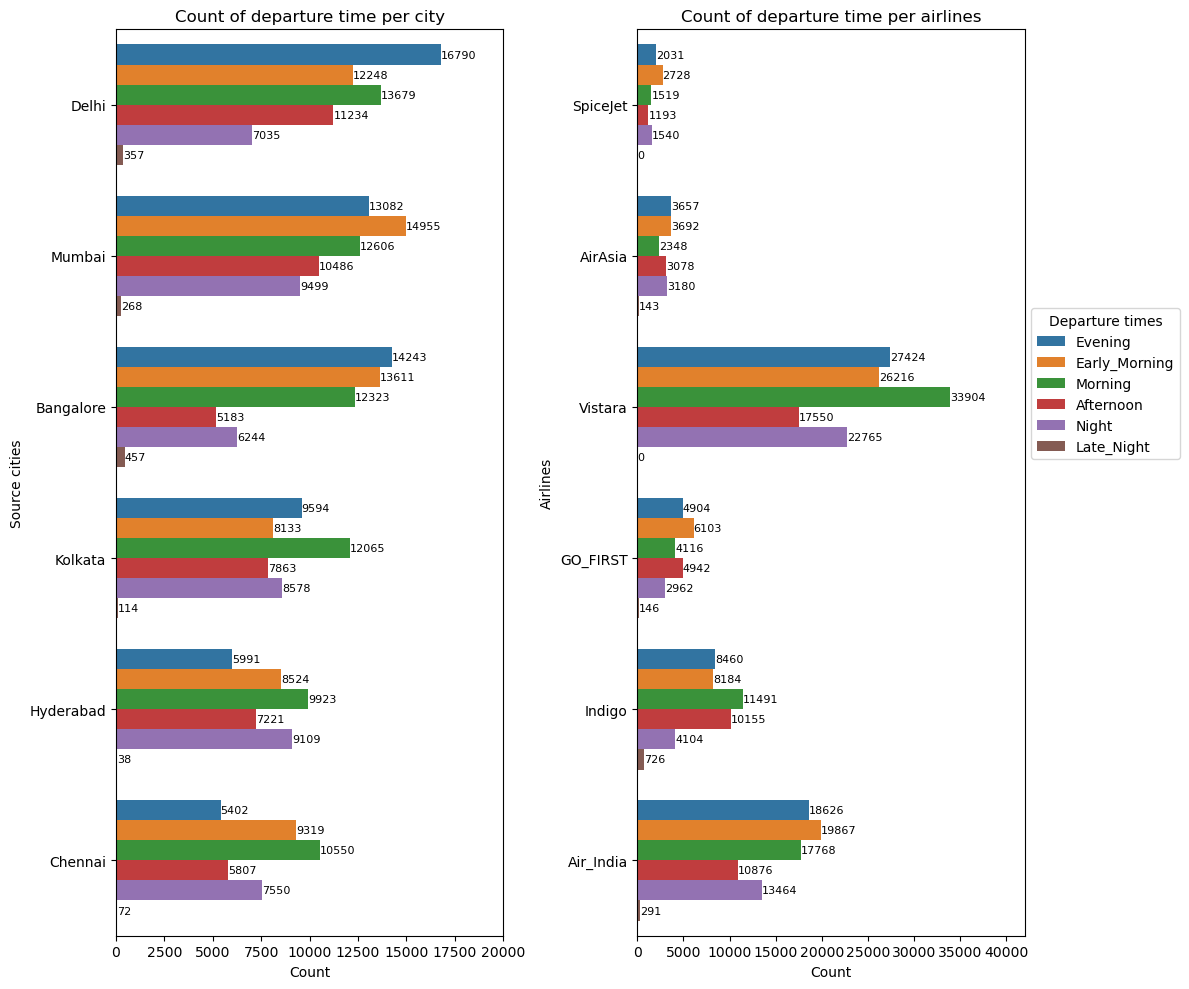

In [16]:
fig, ax = plt.subplots(1, 2, figsize= (12, 10))

# Count of departure time per city chart:

ax1 = sns.countplot(data= df, y= 'source_city', hue= 'departure_time', ax= ax[0])
ax1.set_title('Count of departure time per city')
ax1.legend().remove() # remove ax1 legend.

# Set label for each bar in ax1 countplot: 

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge', fontsize= 8)

ax1.set_ylabel('Source cities')
ax1.set_xlabel('Count')
ax1.set_xlim([0, 2e4])

# Count of departure time per airlines chart:

ax2 = sns.countplot(data= df, y= 'airline', hue= 'departure_time', ax= ax[1])
ax2.set_title('Count of departure time per airlines')

# Set label for each bar in ax2 countplot: 

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge', fontsize= 8)

ax2.legend(title= 'Departure times', bbox_to_anchor= (1, 0.7))
ax2.set_ylabel('Airlines')
ax2.set_xlabel('Count')
ax2.set_xlim([0, 4.2e4])
plt.tight_layout() # adjusts the subplots.
plt.show()

> For cities:
>
> * In Delhi and Bangalore most flights leave in the evening.
> * In Mombai most flights leave in early morning.
> * And in the morning to Kolkata, Hyderabad and Chennai.
>
> For airlines:
>
> * On the company with the most flights, Vistara, the highest volume is due to morning flights.
> * On Air India there is a greater balance, but most flights are early in the morning.
> * Indigo's most flights are in the morning.
> * GO FIRST, AirAsia and SpiceJet have smaller data volumes and the most frequent flights leave early in the morning.

## 5.4. Column `stops`

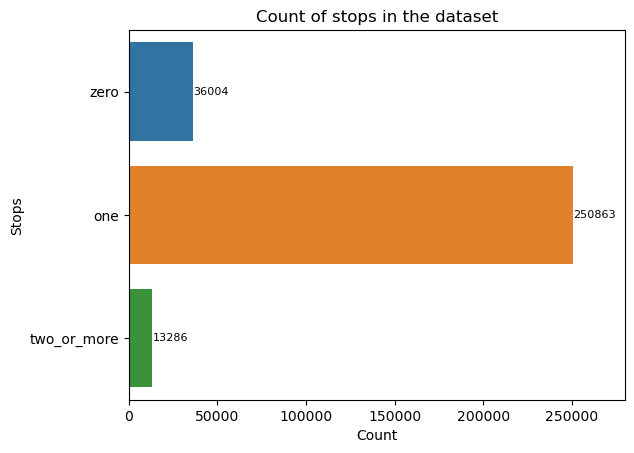

In [17]:
# Count of stops:

ax = sns.countplot(data= df, y= 'stops')

# Set label for each bar in countplot:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_title('Count of stops in the dataset')
ax.set_ylabel('Stops')
ax.set_xlabel('Count')
ax.set_xlim([0, 2.8e5])
plt.show()

### With which airline do flights have the most stops?

In [18]:
flights_by_stops = df.groupby('airline')['stops'].value_counts().to_frame().rename({'stops': 'count'}, axis= 1).reset_index()
flights_by_stops.head()

,airline,stops,count
0,AirAsia,one,11418
1,AirAsia,zero,2434
2,AirAsia,two_or_more,2246
3,Air_India,one,71004
4,Air_India,zero,6409


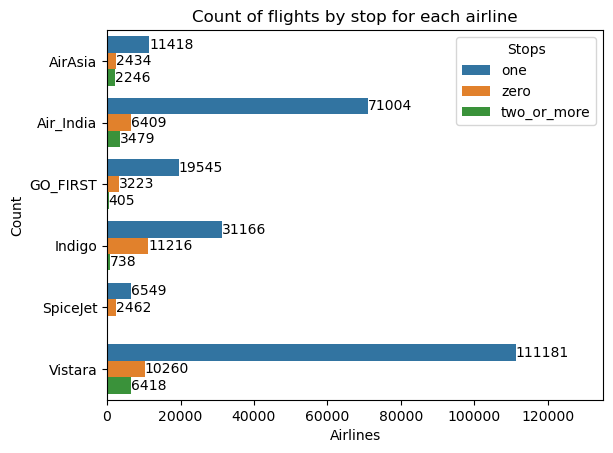

In [19]:
# Horizontal bar chat of flights by stop for each airline:

ax = sns.barplot(data= flights_by_stops, y= 'airline', x= 'count', hue= 'stops', orient= 'h')
ax.set_title('Count of flights by stop for each airline')
ax.legend(title= 'Stops', bbox_to_anchor= (1, 1))

# Set the label of each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_xlabel('Airlines')
ax.set_ylabel('Count')
ax.set_xlim([0, 1.35e5])
plt.show()

> * Regardless of the airline, most flights are one stop.
> * Overall, there are more non-stop flights than two-stop flights.
> * SpiceJet is the only airline in the dataset with no two-stop flights.

## 5.5. Column `arrival_time`

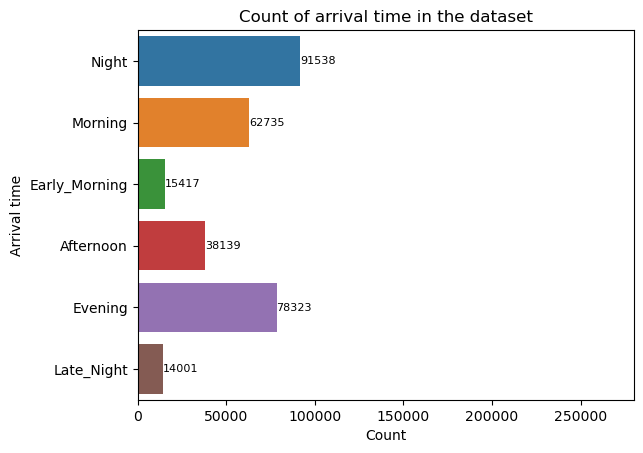

In [20]:
# Count of stops:

ax = sns.countplot(data= df, y= 'arrival_time')

# Set label for each bar in countplot:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_title('Count of arrival time in the dataset')
ax.set_ylabel('Arrival time')
ax.set_xlabel('Count')
ax.set_xlim([0, 2.8e5])
plt.show()

### What are the most common arrival times for cities and airlines?

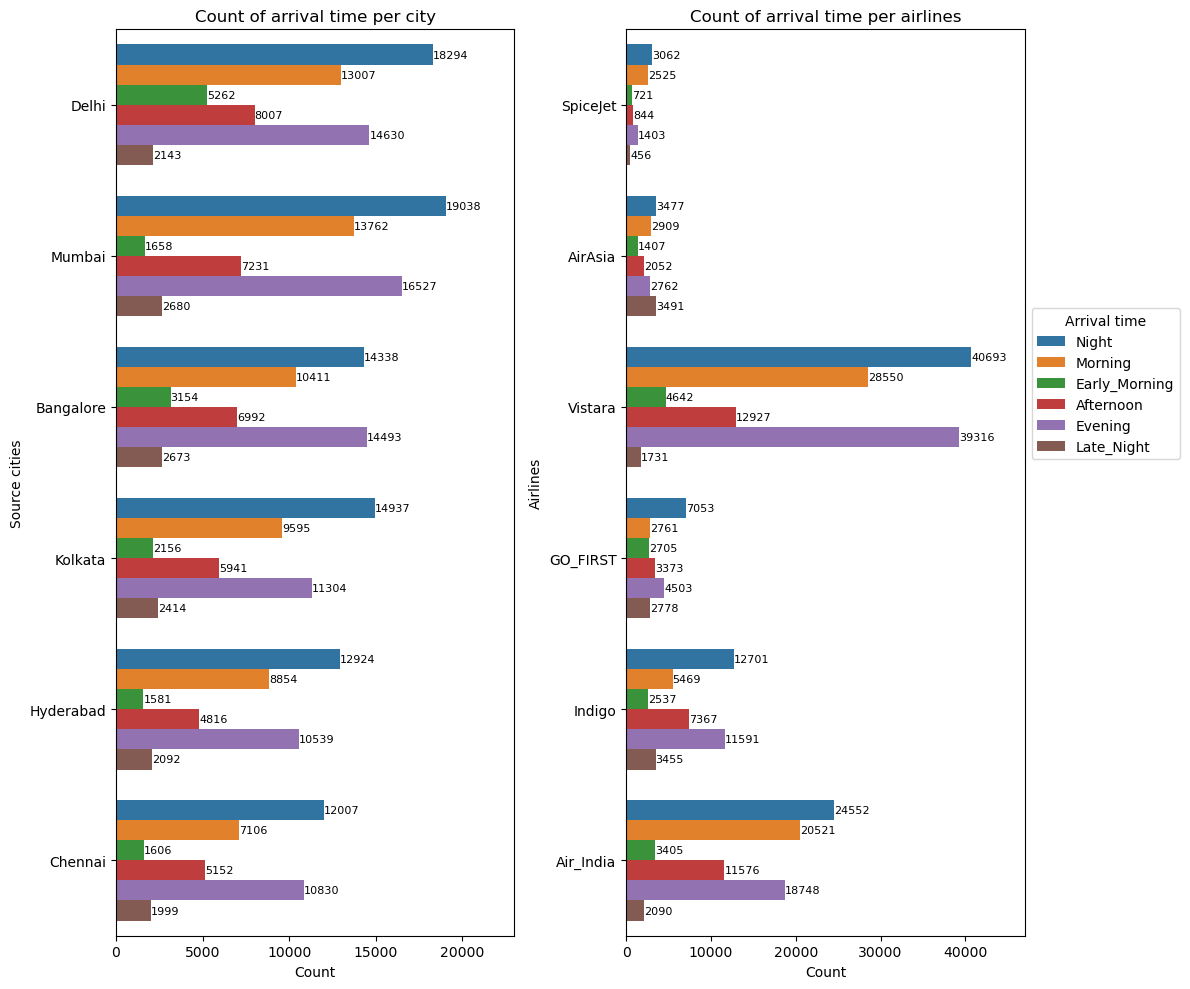

In [21]:
fig, ax = plt.subplots(1, 2, figsize= (12, 10))

# Count of departure time per city chart:

ax1 = sns.countplot(data= df, y= 'source_city', hue= 'arrival_time', ax= ax[0])
ax1.set_title('Count of arrival time per city')
ax1.legend().remove() # remove ax1 legend.

# Set label for each bar in ax1 countplot: 

for container in ax1.containers:
  ax1.bar_label(container, label_type= 'edge', fontsize= 8)

ax1.set_ylabel('Source cities')
ax1.set_xlabel('Count')
ax1.set_xlim([0, 2.3e4])

# Count of departure time per airlines chart:

ax2 = sns.countplot(data= df, y= 'airline', hue= 'arrival_time', ax= ax[1])
ax2.set_title('Count of arrival time per airlines')

# Set label for each bar in ax2 countplot: 

for container in ax2.containers:
  ax2.bar_label(container, label_type= 'edge', fontsize= 8)

ax2.legend(title= 'Arrival time', bbox_to_anchor= (1, 0.7))
ax2.set_ylabel('Airlines')
ax2.set_xlabel('Count')
ax2.set_xlim([0, 4.7e4])
plt.tight_layout() # adjusts the subplots.
plt.show()


> For cities:
>
> * The period of arrival in the cities present in the data set holds a pattern, in descending order: night, evening, morning, afternoon, early morning and late night.
>
> For airlines:
>
> * SpiceJet: low volume of data being the highest in the night and morning periods.
> * AirAsia: low volume of data being the highest late night and night.
> * Vistara: high volume of data being the highest night and evening.
> * Go First: low volume of data being the highest night and evening.
> * Indigo: medium volume of data being the highest night and evening.
> * Air India: high volume of data being the highest 

## 5.6. Column `destination_city`

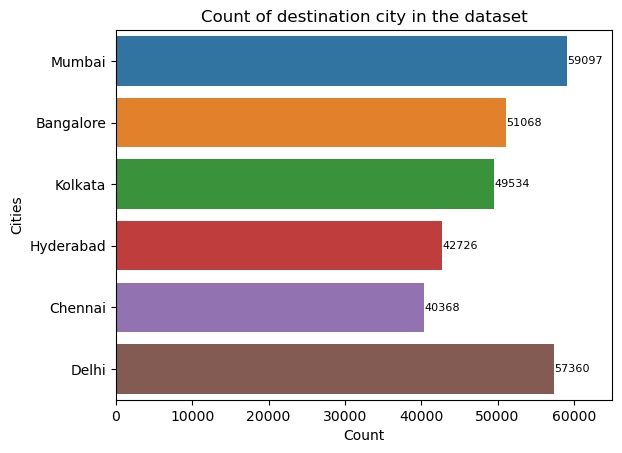

In [22]:
# Count of stops:

ax = sns.countplot(data= df, y= 'destination_city')

# Set label for each bar in countplot:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_title('Count of destination city in the dataset')
ax.set_ylabel('Cities')
ax.set_xlabel('Count')
ax.set_xlim([0, 6.5e4])
plt.show()

> * Mombai and Delhi are the top destinations for the data in the dataset.


### What are the main airline destinations?

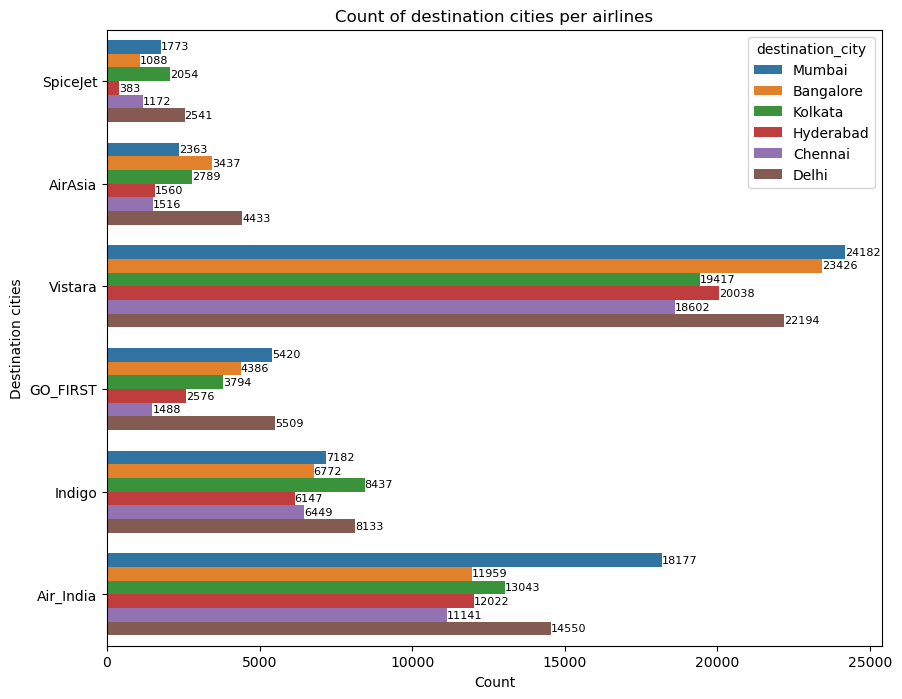

In [23]:
plt.figure(figsize= (10, 8))

# Count of departure time per city chart:

ax = sns.countplot(data= df, y= 'airline', hue= 'destination_city')
ax.set_title('Count of destination cities per airlines')

# Set label for each bar in ax countplot: 

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_ylabel('Destination cities')
ax.set_xlabel('Count')
# ax.set_xlim([0, 2.3e4])
plt.show()

> * Delhi is the main destination for SpiceJet, AirAsia and GO FIRST. In the case of GO FIRST, the superiority of the city is small.
> * Mumbai is the main destination for Vistara (highest volume of data) and AirIndia.
> * The main destination for Indigo is Kolkata.

## 5.7. Column `class` 

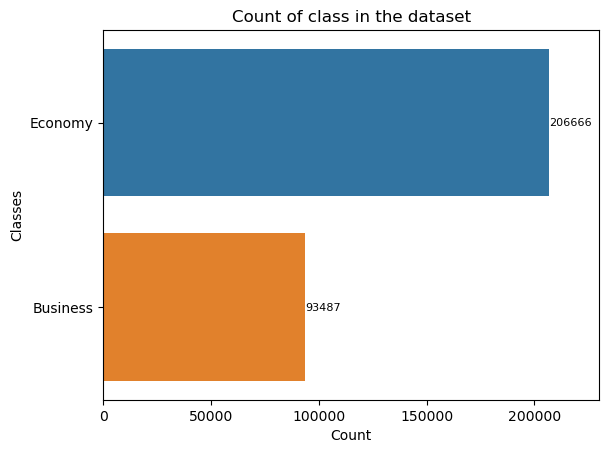

In [24]:
# Count of class in the dataset:

ax = sns.countplot(data= df, y= 'class')

# Set the bar label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_title('Count of class in the dataset')
ax.set_ylabel('Classes')
ax.set_xlabel('Count')
ax.set_xlim([0, 2.3e5])
plt.show()

### How are flights distributed between classes for each airline?

In [25]:
# Table with the number of flights by class for each airline:

flights_by_classes = df.groupby('airline')['class'].value_counts().to_frame().rename({'class': 'count'}, axis= 1).reset_index()
flights_by_classes

,airline,class,count
0,AirAsia,Economy,16098
1,Air_India,Economy,47994
2,Air_India,Business,32898
3,GO_FIRST,Economy,23173
4,Indigo,Economy,43120
5,SpiceJet,Economy,9011
6,Vistara,Economy,67270
7,Vistara,Business,60589


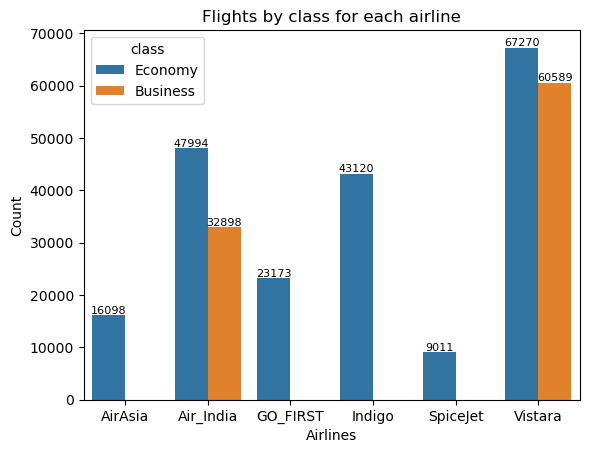

In [26]:
# Bar chart with flights by class:

ax = sns.barplot(data= flights_by_classes, x= 'airline', y= 'count', hue= 'class')
ax.set_title('Flights by class for each airline')

# Set labels for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge', fontsize= 8)

ax.set_xlabel('Airlines')
ax.set_ylabel('Count')
plt.show()

> * Only Air India and Vistara have business class flights in the dataset.
> * The percentage of business class flights by Air India and Vistara are, respectively, 40.66% and 47.38%.

## 5.8. Column `duration`

### 5.8.1. Average, median and standard deviation

In [27]:
pd.DataFrame(
    {'mean': df['duration'].mean(), 
     'median': df['duration'].median(), 
     'standard deviation': df['duration'].std()}
     , index= ['values']
).round(2)

,mean,median,standard deviation
values,12.22,11.25,7.19


### 5.8.2. Frequency distribution of data

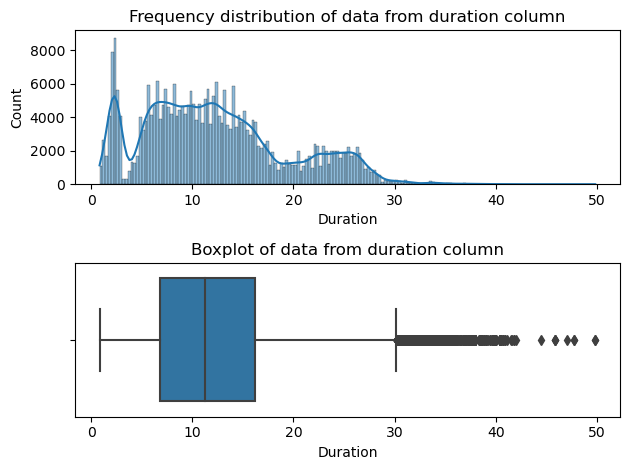

In [28]:
fig, ax = plt.subplots(2, 1)

# Histogram: 

ax1 = sns.histplot(data= df, x= 'duration', kde= True, ax = ax[0])
ax1.set_title('Frequency distribution of data from duration column')
ax1.set_xlabel('Duration')

# Boxplot:

ax2 = sns.boxplot(data= df, x= 'duration', ax= ax[1])
ax2.set_title('Boxplot of data from duration column')
ax2.set_xlabel('Duration')
plt.tight_layout() # adjust the subplots.
plt.show()

### How stops affects flight duration?


In [29]:
df.groupby('stops')['duration'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
stops,,,
one,13.50,12.25,6.51
two_or_more,15.32,12.67,7.39
zero,2.19,2.25,0.50


Medians of one and two or more stops seems very close. But is it possible to say that they are statistically the same? Conducting a hypothesis test is able to answer the question. To choose the test to be applied, it is necessary to visualize the data distribution.

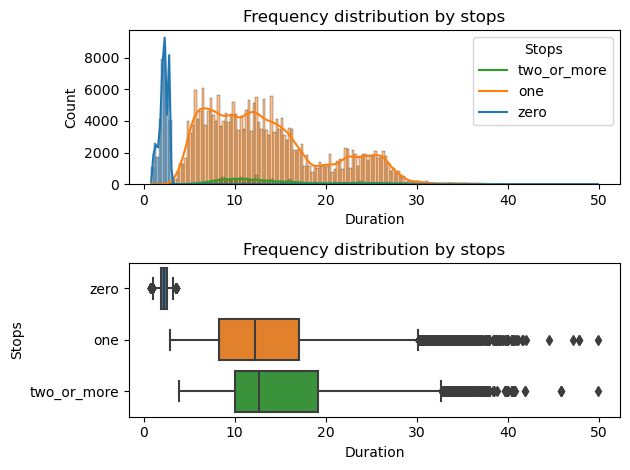

In [30]:
fig, ax = plt.subplots(2, 1)

# Histograms by stops: 

ax1 = sns.histplot(data= df, x= 'duration', hue= 'stops', kde= True, ax= ax[0])
ax1.set_title('Frequency distribution by stops')
ax1.set_xlabel('Duration')
ax1.legend(title= 'Stops', labels= ['two_or_more', 'one', 'zero'])

# Boxplot by stops:

ax2 = sns.boxplot(data=df, x= 'duration', y= 'stops', ax= ax[1])
ax2.set_title('Frequency distribution by stops')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Stops')
plt.tight_layout()
plt.show()

When analyzing the data distribution, it is noticed that none of the samples follows a normal distribution. Therefore, to compare the medians of the samples, it is appropriate to perform the non-parametric Mann-Whitney test.

$md_1 ⇒$ one stop median;

$md_2 ⇒$ two or more stops median; 


> $H_0: md_1 \geq md_2$ 
>
> $H_1: md_1 < md_2$ 

In [31]:
from scipy.stats import mannwhitneyu

# Samples:

one_stop = df.query('stops == "one"')['duration']
two_or_more_stops = df.query('stops == "two_or_more"')['duration']

In [32]:
statistic, pvalue = mannwhitneyu(one_stop, two_or_more_stops, alternative= 'less')

In [33]:
print(f'Statistic = {statistic}')
print('='*32)
print(f'Pvalue = {pvalue}')

Statistic = 1436606543.5
Pvalue = 5.833286764323262e-159


Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [34]:
pvalue <= 0.05

True

> * The hypothesis $H_0$ is rejected. That is, there is statistical evidence to state that the median duration of flights with one stop is shorter than the median duration of flights with two or more stops.

## 5.9. Column `days_left`

### 5.9.1. Average, median and standard deviation

In [35]:
pd.DataFrame(
    {'mean': df['days_left'].mean(), 
     'median': df['days_left'].median(), 
     'standard deviation': df['days_left'].std()}
     , index= ['values']
).round(2)

,mean,median,standard deviation
values,26.0,26.0,13.56


### 5.9.2. Frequency distribution of data

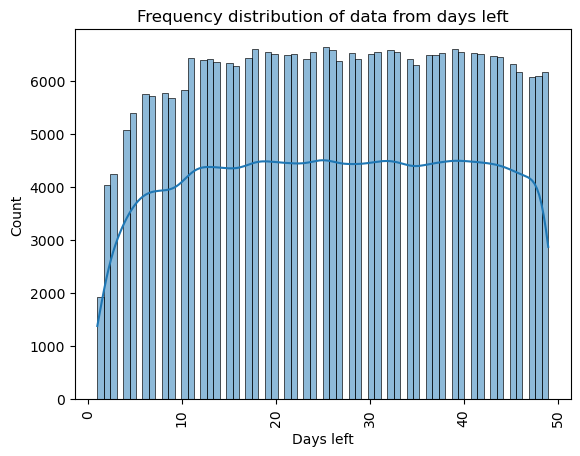

In [36]:
# Frequency distribution of days left

ax = sns.histplot(data= df, x= 'days_left', kde= True)
ax.set_title('Frequency distribution of data from days left')
ax.set_ylabel('Count')
ax.set_xlabel('Days left')
plt.xticks(rotation= 90)
plt.show()

> * Most flights are scheduled at least ten days before they actually take place.

## 5.10. Column `price`

### 5.10.1. Average, median and standard deviation

In [37]:
pd.DataFrame(
    {'mean': df['price'].mean(), 
     'median': df['price'].median(), 
     'standard deviation': df['price'].std()}
     , index= ['values']
).round(2)

,mean,median,standard deviation
values,20889.66,7425.0,22697.77


### 5.10.2. Frequency distribution of data

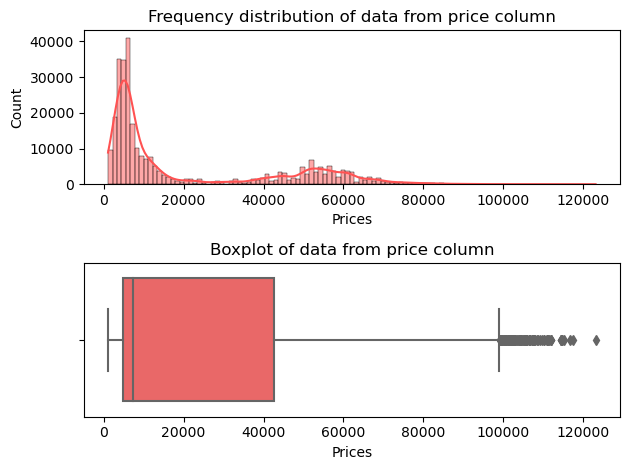

In [38]:
fig, ax = plt.subplots(2, 1)

# Histogram: 

ax1 = sns.histplot(data= df, x= 'price', color= '#ff5252', kde= True, ax = ax[0])
ax1.set_title('Frequency distribution of data from price column')
ax1.set_xlabel('Prices')

# Boxplot:

ax2 = sns.boxplot(data= df, x= 'price', color= '#ff5252', ax= ax[1])
ax2.set_title('Boxplot of data from price column')
ax2.set_xlabel('Prices')
plt.tight_layout() # adjust the subplots.
plt.show()

> * Most data is located up to 20,000 rupees.
> * There is also a relevant number of dice between 40,000 and 70,000 rupees.

### How does the flight class affect the price?

In [39]:
df.groupby('class')['price'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
class,,,
Business,52540.08,53164.0,12969.31
Economy,6572.34,5772.0,3743.52


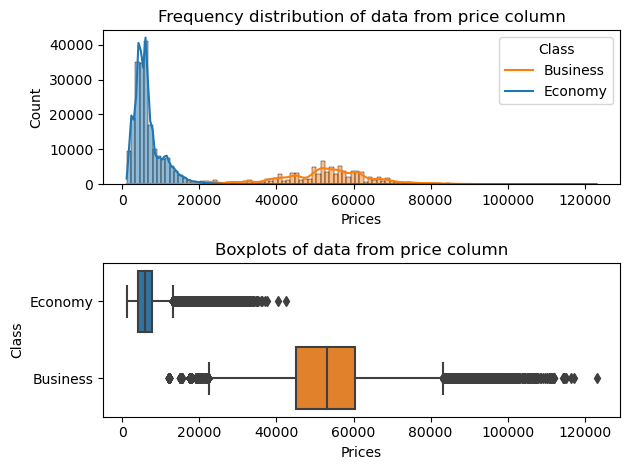

In [40]:
fig, ax = plt.subplots(2, 1)

# Histogram:

ax1 = sns.histplot(data= df, x= 'price', hue= 'class', kde= True, ax= ax[0])
ax1.set_title('Frequency distribution of data from price column')
ax1.set_xlabel('Prices')
ax1.legend(title= 'Class', labels= ['Business', 'Economy'])

# Boxplot:

ax2 = sns.boxplot(data= df, x= 'price', y= 'class', ax= ax[1])
ax2.set_title('Boxplots of data from price column')
ax2.set_xlabel('Prices')
ax2.set_ylabel('Class')
plt.tight_layout()
plt.show()

> * The business class is much more expensive than the economy class, which is logical.

### How does the airline influence the price?

In [41]:
df.groupby('airline')['price'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
airline,,,
AirAsia,4091.07,3276.0,2824.06
Air_India,23507.02,11520.0,20905.12
GO_FIRST,5652.01,5336.0,2513.87
Indigo,5324.22,4453.0,3268.89
SpiceJet,6179.28,5654.0,2999.63
Vistara,30396.54,15543.0,25637.16


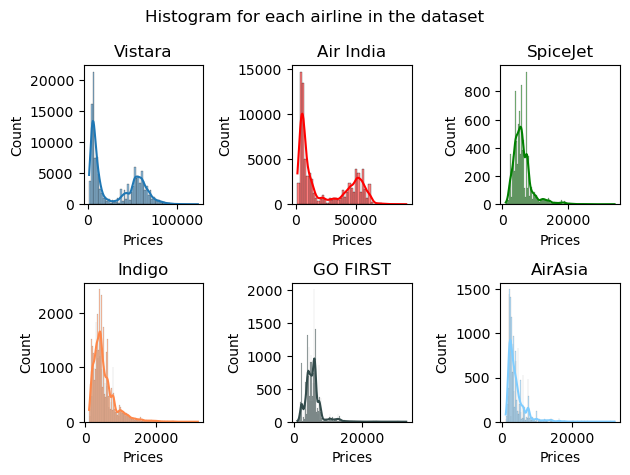

In [42]:
fig, ax = plt.subplots(2, 3)
fig.suptitle('Histogram for each airline in the dataset')

ax1 = sns.histplot(data= df.query('airline == "Vistara"'), x= 'price', kde= True, ax= ax[0, 0])
ax1.set_title('Vistara')
ax1.set_xlabel('Prices')
ax2 = sns.histplot(data= df.query('airline == "Air_India"'), x= 'price', color= 'r', kde= True, ax= ax[0, 1])
ax2.set_title('Air India')
ax2.set_xlabel('Prices')
ax3 = sns.histplot(data= df.query('airline == "SpiceJet"'), x= 'price', color= 'g', kde= True, ax= ax[0, 2])
ax3.set_title('SpiceJet')
ax3.set_xlabel('Prices')
ax4 = sns.histplot(data= df.query('airline == "Indigo"'), x= 'price', color= '#FF8749', kde= True, ax= ax[1, 0])
ax4.set_title('Indigo')
ax4.set_xlabel('Prices')
ax5 = sns.histplot(data= df.query('airline == "GO_FIRST"'), x= 'price', color= '#324B4B', kde= True, ax= ax[1, 1])
ax5.set_title('GO FIRST')
ax5.set_xlabel('Prices')
ax6 = sns.histplot(data= df.query('airline == "AirAsia"'), x= 'price', color= '#7fcdff', kde= True, ax= ax[1, 2])
ax6.set_title('AirAsia')
ax6.set_xlabel('Prices')
plt.tight_layout()
plt.show()

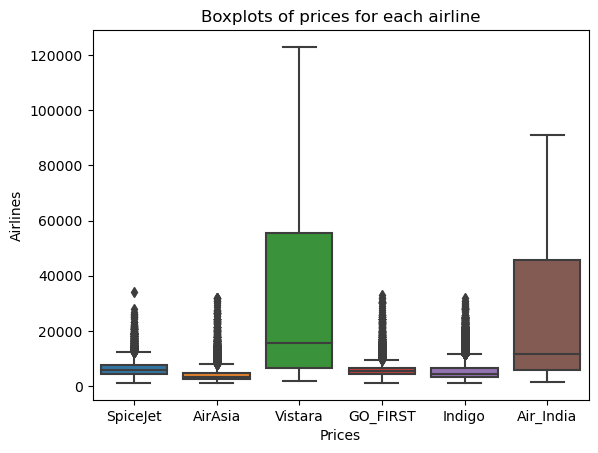

In [43]:
ax = sns.boxplot(data= df, x= 'airline', y= 'price')
ax.set_title('Boxplots of prices for each airline')
ax.set_ylabel('Airlines')
ax.set_xlabel('Prices')
plt.show()

> * Vistara and Air India are the highest priced airlines.

### How do stops influence prices?

In [44]:
df.groupby('stops')['price'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
stops,,,
one,22900.99,7959.0,23626.07
two_or_more,14113.45,8307.0,17664.33
zero,9375.94,4499.0,10623.01


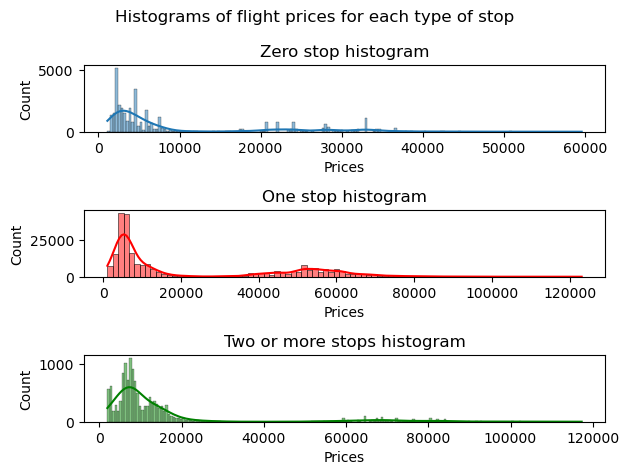

In [45]:
fig, ax = plt.subplots(3, 1)
fig.suptitle('Histograms of flight prices for each type of stop')

ax1 = sns.histplot(data= df.query('stops == "zero"'), x= 'price', kde= True, ax= ax[0])
ax1.set_title('Zero stop histogram')
ax1.set_xlabel('Prices')
ax2 = sns.histplot(data= df.query('stops == "one"'), x= 'price', color= 'r', kde= True, ax= ax[1])
ax2.set_title('One stop histogram')
ax2.set_xlabel('Prices')
ax3 = sns.histplot(data= df.query('stops == "two_or_more"'), x= 'price', color= 'g', kde= True, ax= ax[2])
ax3.set_title('Two or more stops histogram')
ax3.set_xlabel('Prices')
plt.tight_layout()
plt.show()

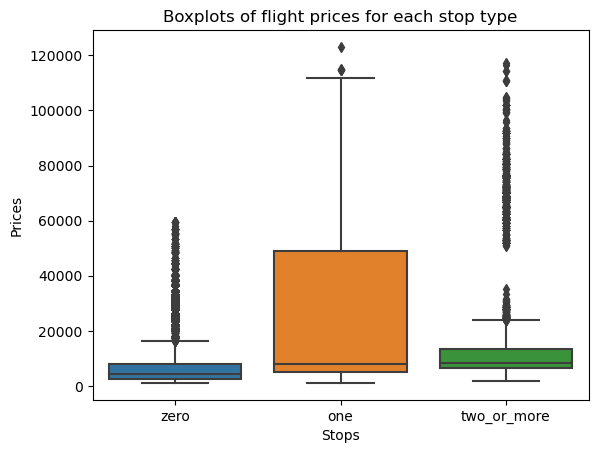

In [46]:
ax = sns.boxplot(data= df, y= 'price', x= 'stops')
ax.set_title('Boxplots of flight prices for each stop type')
ax.set_ylabel('Prices')
ax.set_xlabel('Stops')
plt.show()

When analyzing the data distribution, it is noticed that none of the samples follows a normal distribution. Therefore, to compare the medians of the samples, it is appropriate to perform the non-parametric Mann-Whitney test.

$md_1 ⇒$ one stop prices median;

$md_2 ⇒$ two or more stops prices median; 


> $H_0: md_1 \geq md_2$ 
>
> $H_1: md_1 < md_2$ 

In [47]:
# Samples:

one_stop_prices = df.query('stops == "one"')['price']
two_or_more_stop_prices = df.query('stops == "two_or_more"')['price']

In [48]:
statistic, pvalue = mannwhitneyu(one_stop_prices, two_or_more_stop_prices, alternative= 'less')

In [49]:
print(f'Statistic = {statistic}')
print('='*32)
print(f'Pvalue = {pvalue}')

Statistic = 1705938634.0
Pvalue = 0.9999979513948198


Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [50]:
pvalue <= 0.05

False

> * Failure to reject the $H_0$ hypothesis. That is, there is no statistical evidence to state that the median prices for flights with one stop are lower than the median prices for flights with two or more stops.

### How does duration affect prices?

Due to the presence of very different prices, it was decided to analyze the median prices of flights in order to minimize the influence of possible outliers.

In [51]:
# Calculate the median of prices for each duration:

median_prices_for_duration = df.groupby('duration')['price'].median().reset_index()
median_prices_for_duration.head()

,duration,price
0,0.83,1604.0
1,0.92,1548.0
2,1.00,1776.0
3,1.08,1776.0
4,1.17,1776.0


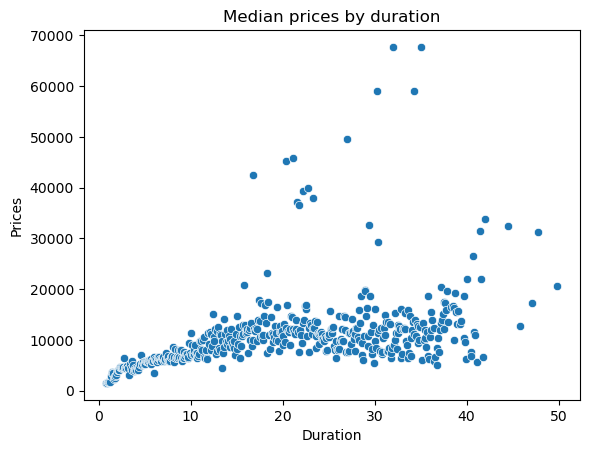

In [52]:
ax = sns.scatterplot(data= median_prices_for_duration, x= 'duration', y= 'price')
ax.set_title('Median prices by duration')
ax.set_ylabel('Prices')
ax.set_xlabel('Duration')
plt.show()

> The relationship between the median prices of flights seems to grow up to durations of 20 hours and then suffer a slight drop. Which indicates a non-linear correlation of these data.

### How does the flight departure time influence prices?

In [53]:
df.groupby('departure_time')['price'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
departure_time,,,
Afternoon,18179.20,6663.0,20928.84
Early_Morning,20370.68,7212.0,22354.88
Evening,21232.36,7425.0,23168.52
Late_Night,9295.30,4499.0,13680.52
Morning,21630.76,8112.0,22968.91
Night,23062.15,7813.0,23617.88


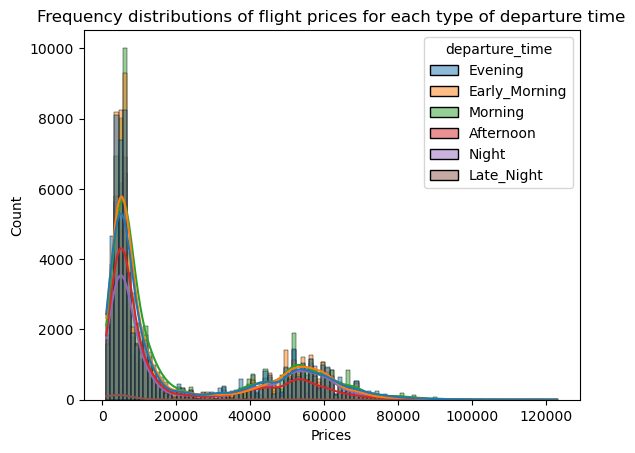

In [54]:
ax = sns.histplot(data= df, x= 'price', hue= 'departure_time', kde= True)
ax.set_title('Frequency distributions of flight prices for each type of departure time')
ax.set_xlabel('Prices')
plt.show()

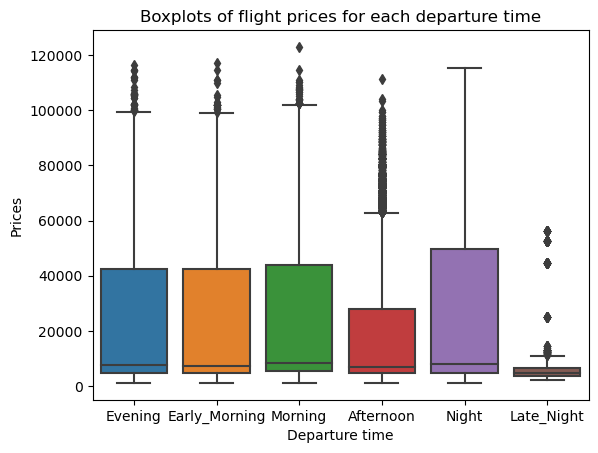

In [55]:
ax = sns.boxplot(data= df, y= 'price', x= 'departure_time')
ax.set_title('Boxplots of flight prices for each departure time')
ax.set_ylabel('Prices')
ax.set_xlabel('Departure time')
plt.show()

Morning and evening flights seem to be the most expensive. Being the morning ones even more expensive than the night ones. However, does this statement have statistical evidence?

In [56]:
# Samples:

morning = df.query('departure_time == "Morning"')['price']
night = df.query('departure_time == "Night"')['price']

$md_1 \Rightarrow$ morning prices median

$md_2 ⇒$ night prices median

> $H_0: md_1 \leq md_2$
>
> $H_1: md_1 > md_2$

In [57]:
statistic, pvalue = mannwhitneyu(morning, night, alternative= 'greater')

In [58]:
print(f'Statistic = {statistic}')
print('='*32)
print(f'Pvalue = {pvalue}')

Statistic = 1737814837.0
Pvalue = 1.5886268263034757e-07


$H_0$ hipothesys is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [59]:
pvalue <= 0.05

True

> There is statistical evidence to reject the $H_0$, that is, it is assumed that the median price of morning flights is higher than the median price of night flights.

### How does the booking date influence the price of the flight?

Due to the presence of very different prices, it was decided to analyze the median prices of flights in order to minimize the influence of possible outliers.

In [60]:
# Calculate the median of prices for each days left:

median_prices_for_days = df.groupby('days_left')['price'].median().reset_index()
median_prices_for_days.head()

,days_left,price
0,1,15163.0
1,2,18017.5
2,3,16333.0
3,4,13054.0
4,5,13054.0


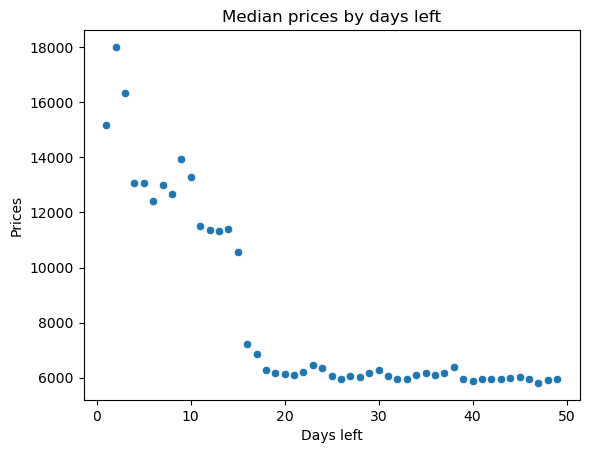

In [61]:
ax = sns.scatterplot(data= median_prices_for_days, x= 'days_left', y= 'price')
ax.set_title('Median prices by days left')
ax.set_ylabel('Prices')
ax.set_xlabel('Days left')
plt.show()

> Prices are higher for flights booked on dates close to your event. The increase is seen on flights booked less than 20 days before the event.

# 6. Price prediction with XGBRegressor

In [62]:
from sklearn.model_selection import train_test_split

## 6.1. Splitting data into training and testing

The intention of the study is to develop a linear regression model capable of predicting flight prices. Therefore, it is necessary to determine the independent variables, with price being the target variable.

In [63]:
# Independet variables:

X = df.drop('price', axis= 1)

# Target variable:

y = df['price']

In [64]:
# The size of test data is setted, as well as the random state:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

## 6.2. Encoding of categorical variables

In [65]:
import category_encoders as ce

In [66]:
# Categorical variables of the data:

categorical_columns = [
    'airline', 'source_city', 'departure_time', 'stops',
    'arrival_time', 'destination_city', 'class'
]

The use of Target Encoding is chosen over One Hot Encoding. Because, the use of One Hot Encoding would lead to high data cardinality. However, using Target Encoding can bring some problems like overfitting. To minimize the chance of this happening use a smoothing factor.

In [67]:
encoder = ce.TargetEncoder(cols= categorical_columns, smoothing= 0.5)

In [68]:
X_train = encoder.fit_transform(X_train, y_train)

In [69]:
X_test = encoder.transform(X_test)

## 6.3. Data normalization

In [70]:
from sklearn.preprocessing import RobustScaler

As there is a considerable difference in the scales of the encoded data and the numerical data, it is important to normalize them. We choose to use the RobustScaler, unlike other normalization methods like Min-Max scaling or Z-score normalization, which are sensitive to outliers, RobustScaler uses robust statistics to scale the data. It works by subtracting the median from each data point and then dividing it by the interquartile range (IQR), which is a measure of the data's spread.

In [71]:
rs = RobustScaler()

In [72]:
X_train = rs.fit_transform(X_train)

In [73]:
X_test = rs.transform(X_test)

## 6.4. Model training


In [74]:
import xgboost as xgb

In [75]:
model = xgb.XGBRegressor()

In [76]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
y_pred = model.predict(X_test)

## 6.5. Model evaluation

In [78]:
from sklearn import metrics

A function is defined with metrics for evaluating the model.

In [79]:
def model_metrics(y, pred):
  MAE = metrics.mean_absolute_error(y, pred)
  MSE = metrics.mean_squared_error(y, pred)
  RMSE = np.sqrt(metrics.mean_squared_error(y, pred))
  R2 = metrics.r2_score(y, pred)
  adjusted_R2 = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

  print(f'Mean Absolute Error = {MAE}')
  print('='*45)
  print(f'Mean Squared Error = {MSE}')
  print('='*45)
  print(f'Root Mean Squared Error = {RMSE}')
  print('='*45)
  print(f'R² = {R2}')
  print('='*45)
  print(f'Adjusted R² = {adjusted_R2}')

* The assessment below is made using the predicted values ​​from the **test data**:

In [80]:
model_metrics(y_test, y_pred)

Mean Absolute Error = 2030.858373256414
Mean Squared Error = 12574532.11087665
Root Mean Squared Error = 3546.0586727910536
R² = 0.9756049744654947
Adjusted R² = 0.9756025359383521


* The assessment below is made using the predicted values ​​from the **training data**:

In [81]:
y_train_pred = model.predict(X_train)

In [82]:
model_metrics(y_train, y_train_pred)

Mean Absolute Error = 1983.8253437426724
Mean Squared Error = 11834004.725266356
Root Mean Squared Error = 3440.0588258438775
R² = 0.9770245683856383
Adjusted R² = 0.9770235841788932


> The model presents a good fit between the data predicted by the training and test data.

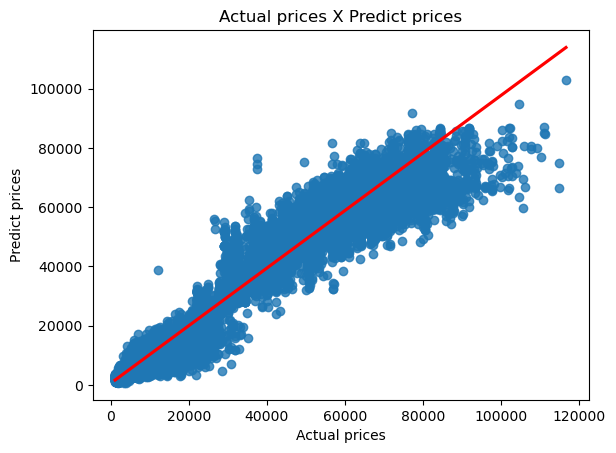

In [83]:
ax = sns.regplot(x= y_test, y= y_pred, line_kws= {'color': 'red'})
ax.set_title('Actual prices X Predict prices')
ax.set_xlabel('Actual prices')
ax.set_ylabel('Predict prices')
plt.show()

### 6.5.1. Residual evaluation

Residual error is the difference between actual values ​​and predicted values. They are important in evaluating the machine learning model.

In [84]:
residual = y_test - y_pred

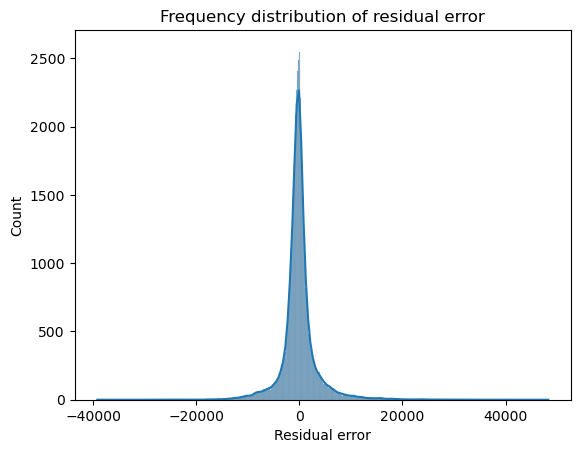

In [85]:
ax = sns.histplot(residual, kde= True)
ax.set_title('Frequency distribution of residual error')
ax.set_xlabel('Residual error')
plt.show()

> The frequency distribution of the residuals appears to follow a normal distribution.